In [2]:
90from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [0]:
#Reading data
data=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Data/musk.csv')

In [167]:
data.head()

,ID,molecule_name,conformation_name,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,1,MUSK-211,211_1+1,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,-165,...,81,-114,-187,45,-118,-75,-182,-234,-19,12,-13,-41,-119,-149,70,17,-20,-177,-101,-116,-14,-50,24,-81,-125,-114,-44,128,3,-244,-308,52,-7,39,126,156,-50,-112,96,1
1,2,MUSK-211,211_1+10,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-281,-300,54,-149,-98,-196,-27,-22,2,75,49,-34,45,-91,32,95,-116,85,-23,42,-58,61,-171,...,88,-21,-32,32,-128,-72,-124,-218,-94,53,-79,-20,-35,-26,4,50,17,-177,-102,-121,-66,-77,51,-41,-34,-32,-63,115,-5,-235,-59,-2,52,103,136,169,-61,-136,79,1
2,3,MUSK-211,211_1+11,46,-194,-145,28,-117,73,57,-168,-39,-22,-319,-111,-104,-283,-282,-303,52,-152,-97,-225,-28,-22,2,179,49,-33,46,-88,22,79,-116,19,-11,6,-38,71,-175,...,64,0,-23,-15,-129,-74,-125,-221,-93,53,-72,-19,-33,-26,3,49,17,-177,-102,-119,-66,-81,51,-41,-27,-41,-140,77,-163,-238,-134,-154,57,143,142,165,-67,-145,39,1
3,4,MUSK-211,211_1+12,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,77,48,-34,46,-91,32,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-77,52,-41,-34,-32,-66,115,-7,-236,-60,-4,52,104,136,168,-60,-135,80,1
4,5,MUSK-211,211_1+13,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,78,48,-34,46,-91,31,94,-116,84,-23,41,-58,62,-171,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-76,52,-41,-34,-32,-66,115,-8,-236,-60,-4,52,104,137,168,-60,-135,80,1


In [168]:
data.isnull().sum()

ID                   0
molecule_name        0
conformation_name    0
f1                   0
f2                   0
                    ..
f163                 0
f164                 0
f165                 0
f166                 0
class                0
Length: 170, dtype: int64

In [169]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6598 entries, 0 to 6597
Columns: 170 entries, ID to class
dtypes: int64(168), object(2)
memory usage: 8.6+ MB


In [170]:
data.shape


(6598, 170)

In [171]:
data.columns

Index(['ID', 'molecule_name', 'conformation_name', 'f1', 'f2', 'f3', 'f4',
       'f5', 'f6', 'f7',
       ...
       'f158', 'f159', 'f160', 'f161', 'f162', 'f163', 'f164', 'f165', 'f166',
       'class'],
      dtype='object', length=170)

In [172]:
data.describe()

,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
count,6598.00000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,...,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
mean,3299.50000,58.945135,-119.128524,-73.146560,-0.628372,-103.533495,18.359806,-14.108821,-1.858290,-86.003031,-44.495756,-119.456502,-84.929221,-61.911185,-127.935283,-123.005153,-265.690967,-53.415732,-67.741285,-52.352531,-44.902698,-75.645953,-55.783419,-61.619127,72.506062,32.285238,-69.659139,-15.361018,-102.665959,8.520764,12.553956,-82.314186,25.436193,-34.503183,-78.915732,-73.199000,115.882995,-115.562746,-7.853289,-75.578509,...,-19.476811,-68.070627,-94.963474,2.993786,-36.652774,-79.191422,-90.778266,-95.868142,-28.259473,-8.521067,-37.599121,-67.789330,-51.976508,-65.693089,-0.443165,1.331464,-21.754319,-165.748863,-87.364050,-113.114580,-18.523644,-41.386481,8.755077,-55.026069,-61.105335,-54.810397,-76.831161,33.209912,-61.212337,-210.975447,-184.798272,-75.795696,-26.073204,64.616702,112.037739,201.760230,-47.488330,-150.259927,41.770233,0.154138
std,1904.82287,53.249007,90.813375,67.956235,80.444617,64.387559,80.593655,115.315673,90.372537,108.326676,72.088903,108.911397,79.541410,61.444281,101.191126,98.009158,70.647329,117.237608,61.403085,82.503477,79.304489,75.187995,101.908604,94.524709,123.334433,108.105908,101.325550,91.621335,73.778232,63.484770,126.086157,80.225924,106.627993,57.816952,118.201270,75.350809,57.070192,104.682519,85.732778,70.534415,...,130.607205,70.016546,98.100733,60.633027,84.316386,61.733776,68.098995,87.253395,61.664300,97.997434,77.580190,94.753428,64.344336,69.094605,82.410293,103.746483,103.113954,54.087579,51.177725,21.463582,63.048333,73.864481,83.274158,60.100098,70.788743,67.538140,76.908685,98.511502,97.547356,83.710890,107.819514,127.861271,69.727964,100.861935,72.835040,59.526751,55.069365,76.019023,94.116085,0.361108
min,1.00000,-31.000000,-199.000000,-167.000000,-114.000000,-118.000000,-183.000000,-171.000000,-225.000000,-245.000000,-286.000000,-328.000000,-321.000000,-305.000000,-342.000000,-294.000000,-327.000000,-224.000000,-308.000000,-286.000000,-252.000000,-295.000000,-185.000000,-253.000000,-76.000000,-100.000000,-242.000000,-205.000000,-166.000000,-142.000000,-162.000000,-117.000000,-143.000000,-139.000000,-279.000000,-160.000000,-7.000000,-175.000000,-190.000000,-148.000000,...,-221.000000,-307.000000,-189.000000,-123.000000,-140.000000,-319.000000,-338.000000,-336.000000,-196.000000,-197.000000,-199.000000,-243.000000,-283.000000,-290.000000,-185.000000,-157.000000,-171.000000,-179.000000,-106.000000,-136.000000,-200.000000,-213.000000,-190.000000,-140.000000,-128.000000,-114.000000,-173.000000,-143.000000,-198.000000,-257.000000,-328.000000,-219.000000,-136.000000,-120.000000,-69.000000,73.000000,-289.000000,-428.000000,-471.000000,0.000000
25%,1650.25000,3

In [0]:
#dropping columns
data=data.drop(['ID','molecule_name','conformation_name'],axis=1)

In [174]:
data.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,...,f128,f129,f130,f131,f132,f133,f134,f135,f136,f137,f138,f139,f140,f141,f142,f143,f144,f145,f146,f147,f148,f149,f150,f151,f152,f153,f154,f155,f156,f157,f158,f159,f160,f161,f162,f163,f164,f165,f166,class
0,46,-108,-60,-69,-117,49,38,-161,-8,5,-323,-220,-113,-299,-283,-307,-31,-106,-227,-42,-59,-22,-67,189,81,17,-27,-89,-67,105,-116,124,-106,5,-120,63,-165,40,-27,68,...,81,-114,-187,45,-118,-75,-182,-234,-19,12,-13,-41,-119,-149,70,17,-20,-177,-101,-116,-14,-50,24,-81,-125,-114,-44,128,3,-244,-308,52,-7,39,126,156,-50,-112,96,1
1,41,-188,-145,22,-117,-6,57,-171,-39,-100,-319,-111,-228,-281,-281,-300,54,-149,-98,-196,-27,-22,2,75,49,-34,45,-91,32,95,-116,85,-23,42,-58,61,-171,2,-144,38,...,88,-21,-32,32,-128,-72,-124,-218,-94,53,-79,-20,-35,-26,4,50,17,-177,-102,-121,-66,-77,51,-41,-34,-32,-63,115,-5,-235,-59,-2,52,103,136,169,-61,-136,79,1
2,46,-194,-145,28,-117,73,57,-168,-39,-22,-319,-111,-104,-283,-282,-303,52,-152,-97,-225,-28,-22,2,179,49,-33,46,-88,22,79,-116,19,-11,6,-38,71,-175,3,-129,37,...,64,0,-23,-15,-129,-74,-125,-221,-93,53,-72,-19,-33,-26,3,49,17,-177,-102,-119,-66,-81,51,-41,-27,-41,-140,77,-163,-238,-134,-154,57,143,142,165,-67,-145,39,1
3,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,77,48,-34,46,-91,32,94,-116,84,-23,41,-58,62,-171,3,-144,38,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-77,52,-41,-34,-32,-66,115,-7,-236,-60,-4,52,104,136,168,-60,-135,80,1
4,41,-188,-145,22,-117,-7,57,-170,-39,-99,-319,-111,-228,-282,-281,-301,54,-150,-98,-196,-28,-22,2,78,48,-34,46,-91,31,94,-116,84,-23,41,-58,62,-171,3,-144,38,...,88,-20,-32,32,-128,-73,-125,-220,-93,53,-78,-19,-34,-26,4,50,17,-177,-101,-121,-65,-76,52,-41,-34,-32,-66,115,-8,-236,-60,-4,52,104,137,168,-60,-135,80,1


In [175]:
data['class'].value_counts()

0    5581
1    1017
Name: class, dtype: int64

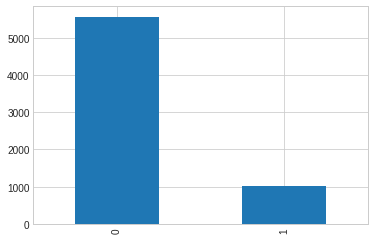

In [176]:
data['class'].value_counts().plot(kind="bar")

In [0]:
#splitting data into dependent and independent variables

X = data.iloc[:,:169].values
y = data.iloc[:,-1].values

In [0]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X = pd.DataFrame(sc.fit_transform(X))

In [179]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166
0,-0.243124,0.122552,0.193471,-0.849986,-0.209163,0.380210,0.451914,-1.761086,0.720127,0.686645,-1.869032,-1.698248,-0.831529,-1.690639,-1.632572,-0.584766,0.191214,-0.623122,-2.117010,0.036605,0.221408,0.331532,-0.056930,0.944609,0.450655,0.855319,-0.127043,0.185244,-1.189679,0.733253,-0.419919,0.924441,-1.236700,0.709993,-0.621155,-0.926701,-0.472295,0.558210,0.688773,0.684873,...,0.769364,-0.656029,-0.938255,0.692847,-0.964859,0.0679,-1.339647,-1.583232,0.150171,0.20942,0.317104,0.282748,-1.041717,-1.205785,0.854851,0.151039,0.017015,-0.208033,-0.266463,-0.134443,0.071754,-0.116621,0.183083,-0.432211,-0.902679,-0.876454,0.426917,0.962296,0.658318,-0.394537,-1.142753,0.999563,0.273558,-0.253997,0.191712,-0.768792,-0.045613,0.503332,0.576245,2.342586
1,-0.337030,-0.758442,-1.057429,0.281313,-0.209163,-0.302278,0.616692,-1.871747,0.433934,-0.770000,-1.832302,-0.327788,-2.703285,-1.512744,-1.612164,-0.485675,0.916292,-1.323466,-0.553321,-1.905425,0.647040,0.331532,0.673093,0.020222,0.154626,0.351953,0.658860,0.158134,0.369868,0.653936,-0.419919,0.558656,0.198974,1.023042,0.201725,-0.961748,-0.529615,0.114939,-0.970118,0.313328,...,0.822963,0.672330,0.641873,0.478426,-1.083469,0.1165,-0.487882,-1.399844,-1.066184,0.62783,-0.533693,0.504393,0.263858,0.574518,0.053919,0.469146,0.375868,-0.208033,-0.286004,-0.367414,-0.753072,-0.482183,0.507338,0.233396,0.382934,0.337767,0.179852,0.830322,0.576301,-0.287016,1.166837,0.577198,1.119768,0.380582,0.329019,-0.550386,-0.245376,0.187598,0.395603,2.342586
2,-0.243124,-0.824517,-1.057429,0.355904,-0.209163,0.678023,0.616692,-1.838549,0.433934,0.312079,-1.832302,-0.327788,-0.685043,-1.532511,-1.622368,-0.528143,0.899231,-1.372327,-0.541200,-2.271132,0.633739,0.331532,0.673093,0.863522,0.154626,0.361823,0.669775,0.198799,0.212338,0.527029,-0.419919,-0.060366,0.406541,0.718454,0.467170,-0.786512,-0.567829,0.126604,-0.757439,0.300943,...,0.639192,0.972281,0.733623,-0.296788,-1.095330,0.0841,-0.502567,-1.434229,-1.049966,0.62783,-0.443457,0.514947,0.294944,0.574518,0.041784,0.459506,0.375868,-0.208033,-0.286004,-0.274226,-0.753072,-0.536341,0.507338,0.233396,0.481827,0.204498,-0.821411,0.444551,-1.043548,-0.322856,0.471177,-0.611680,1.191480,0.777193,0.411403,-0.617588,-0.354338,0.069197,-0.029436,2.342586
3,-0.337030,-0.758442,-1.057429,0.281313,-0.209163,-0.314686,0.616692,-1.860681,0.433934,-0.756127,-1.832302,-0.327788,-2.703285,-1.522628,-1.612164,-0.499831,0.916292,-1.339753,-0.553321,-1.905425,0.633739,0.331532,0.673093,0.036440,0.145376,0.351953,0.669775,0.158134,0.369868,0.646004,-0.419919,0.549276,0.198974,1.014581,0.201725,-0.944225,-0.529615,0.126604,-0.970118,0.313328,...,0.822963,0.686613,0.641873,0.478426,-1.083469,0.1003,-0.502567,-1.422767,-1.049966,0.62783,-0.520802,0.514947,0.279401,0.574518,0.053919,0.469146,0.375868,-0.208033,-0.266463,-0.367414,-0.737210,-0.482183,0.519347,0.233396,0.382934,0.337767,0.140842,0.830322,0.555796,-0.298963,1.157562,0.561555,1.119768,0.390497,0.329019,-0.567187,-0.227216,0.200753,0.406229,2.342586
4,-0.337030,-0.758442,-1.057429,0.281313,-0.209163,-0.314686,0.616692,-1.860681,0.433934,-0.756127,-1.832302,-0.327788,-2.703285,-1.522628,-1.612164,-0.499831,0.916292,-1.339753,-0.553321,-1.905425,0.633739,0.331532,0.673093,0.044548,0.145376,0.351953,0.669775,0.158134,0.354115,0.646004,-0.419919,0.549276,0.198974,1.014581,0.201725,-0.944225,-0.529615,0.126604,-0.970118,0.313328,...,0.822963,0.686613,0.641873,0.478426,-1.083469,0.1003,-0.502567,-1.422767,-1.049966,0.62783,-0.520802,0.514947,0.279401,0.574518,0.053919,0.469146,0.375868,-0.208033,-0.266463,-0.367414,-0.737210,-0.468644,0.519347,0.233396,0.382934,0.337767,0.140842,0.830322,0.545544,-0.298963,1.157562,0.561555,1.119768,

In [0]:
#Splitting dataset into traning and validation in 80:20

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [181]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5278, 167)
(1320, 167)
(5278,)
(1320,)


In [0]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(128, input_dim=167, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [183]:
# fit the keras model on the dataset
history = model.fit(X_train, y_train, validation_split=0.33, batch_size = 10, nb_epoch = 30)
accuracy=model.evaluate(X_test,y_test,verbose=0)
print(accuracy)

Train on 3536 samples, validate on 1742 samples
Epoch 1/30
3536/3536 [==============================] - 1s 377us/step - loss: 0.0849 - acc: 0.9678 - val_loss: 0.0042 - val_acc: 1.0000
Epoch 2/30
3536/3536 [==============================] - 1s 199us/step - loss: 0.0015 - acc: 1.0000 - val_loss: 0.0011 - val_acc: 1.0000
Epoch 3/30
3536/3536 [==============================] - 1s 211us/step - loss: 4.2577e-04 - acc: 1.0000 - val_loss: 5.9073e-04 - val_acc: 1.0000
Epoch 4/30
3536/3536 [==============================] - 1s 205us/step - loss: 2.0388e-04 - acc: 1.0000 - val_loss: 3.7255e-04 - val_acc: 1.0000
Epoch 5/30
3536/3536 [==============================] - 1s 205us/step - loss: 1.1871e-04 - acc: 1.0000 - val_loss: 2.5365e-04 - val_acc: 1.0000
Epoch 6/30
3536/3536 [==============================] - 1s 212us/step - loss: 7.5497e-05 - acc: 1.0000 - val_loss: 1.8661e-04 - val_acc: 1.0000
Epoch 7/30
3536/3536 [==============================] - 1s 215us/step - loss: 5.0482e-05 - acc: 1.0000 -

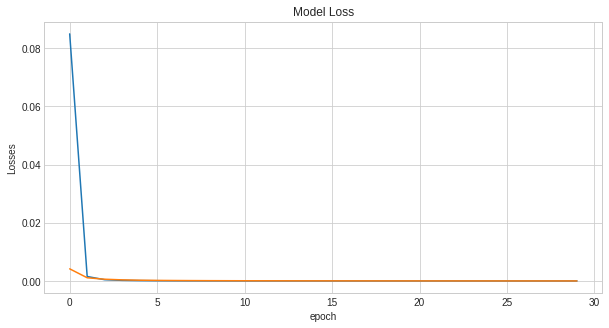

In [184]:
#Plotting graphs
#Train and Validation data loss plot
plt.figure(figsize=(10,5))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('Losses')
plt.show()

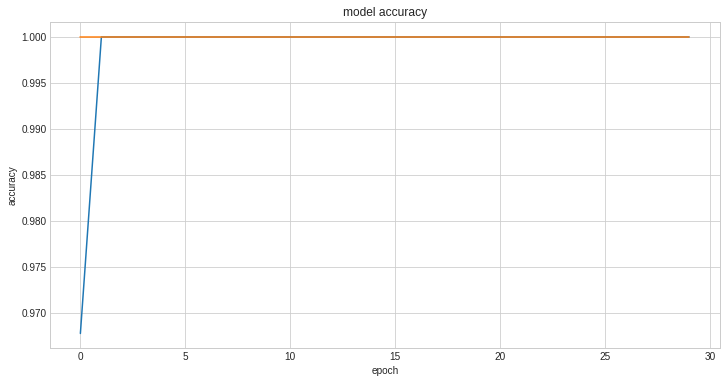

In [185]:
#Accuracy Plot
plt.figure(figsize=(12,6))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [0]:
#Performance Measures

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [188]:
cm

array([[1120,    0],
       [   0,  200]])

In [0]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

In [190]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

In [191]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1120
           1       1.00      1.00      1.00       200

    accuracy                           1.00      1320
   macro avg       1.00      1.00      1.00      1320
weighted avg       1.00      1.00      1.00      1320



In [0]:
#Saving final model
model.save('musk_model.h5')